# 2 Use pre-trained BERT for sentiment analysis

In [2]:
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels= 5)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

plt.style.use('seaborn-white')
%matplotlib inline

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [88]:
import numpy as np

In [3]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  3845      
Total params: 109,486,085
Trainable params: 109,486,085
Non-trainable params: 0
_________________________________________________________________


In [4]:
df_dedup = pd.read_csv("./ReviewsDedupLowNT.csv.zip", compression="zip", index_col=0)

In [5]:
df_dedup.tail(10)

,Text,Summary,Score,HelpfulnessNumerator,HelpfulnessDenominator
394993,zotz's are the best candies.i order a box of 4...,great candy,5,0,0
394994,zzzzzzz. I had high hopes for this coffee and ...,Caffeen Addicts Need Not Apply,1,1,2
394995,~ I got this after hearing how someone else li...,"SO MUCH EXPECTATION, SO LITTLE STOCK",2,0,2
394996,"~ I ordered Farie's Finest Coconut powder, Map...","EXCELLENT Quality & Taste; Very, Very Versatil...",5,6,6
394997,"~ Quick Take: Tasty, chewy, soft-baked cookies...",Quaker Soft Baked Oatmeal Cookies,5,1,2
394998,~<br /><br />These are soooooooooooooooooooooo...,"Yummy. yummy, yummy!!!",5,0,3
394999,~<br />This is a `3 for the price of 1' review...,PURE CHOCOLATE MALLOMARS COOKIES,4,0,0
395000,~<br />This would be a great coffee drink to g...,So-So Espresso Style Coffee Drink,3,1,2
395001,"~Earth's Best Infant Formula Soy Iron, 13.2-Ou...",Earth's Best Soy Baby Formula,5,0,0
395002,~Taste..... I was expecting it to taste pretty...,Ehh okay I guess....,2,1,1


In [6]:
text_labels = df_dedup.drop(columns=["Summary", "HelpfulnessNumerator", "HelpfulnessDenominator"])
text_labels = text_labels.rename(columns={"Text": "DATA_COLUMN", "Score": "LABEL_COLUMN"})
text_labels["LABEL_COLUMN"] = text_labels["LABEL_COLUMN"] - 1

In [7]:
text_labels.tail()

,DATA_COLUMN,LABEL_COLUMN
394998,~<br /><br />These are soooooooooooooooooooooo...,4
394999,~<br />This is a `3 for the price of 1' review...,3
395000,~<br />This would be a great coffee drink to g...,2
395001,"~Earth's Best Infant Formula Soy Iron, 13.2-Ou...",4
395002,~Taste..... I was expecting it to taste pretty...,1


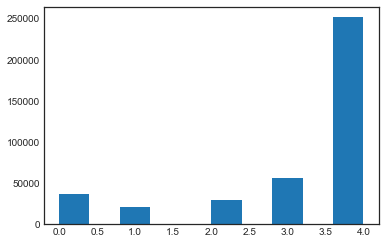

In [8]:
#import matplotlib.pyplot as plt
plt.hist(text_labels["LABEL_COLUMN"]);

In [9]:
train = text_labels.sample(frac=0.8,random_state=123)
test = text_labels.drop(train.index)

In [10]:
test.tail()

,DATA_COLUMN,LABEL_COLUMN
394984,"yummy, but not really much cheaper then walmar...",4
394990,"yummyyyy!very flavourful and easy to make, but...",4
394992,zico probably has the best taste of the coconu...,4
394994,zzzzzzz. I had high hopes for this coffee and ...,0
395000,~<br />This would be a great coffee drink to g...,2


In [ ]:
#target = target - 1

In [ ]:
#in_text = df_dedup.pop("Text")

In [ ]:
#df_dedup.head()

In [11]:
df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395003 entries, 0 to 395002
Data columns (total 5 columns):
Text                      395003 non-null object
Summary                   395003 non-null object
Score                     395003 non-null int64
HelpfulnessNumerator      395003 non-null int64
HelpfulnessDenominator    395003 non-null int64
dtypes: int64(3), object(2)
memory usage: 18.1+ MB


In [ ]:
#target.head(10)

In [ ]:
#dataset = tf.data.Dataset.from_tensor_slices((in_text.values, target.values)).shuffle(10, reshuffle_each_iteration=False, seed=123)

In [ ]:
#test = dataset.enumerate() \
#                    .filter(lambda x,y: x % 5 == 0) \
#                    .map(lambda x,y: y)
#
#train = dataset.enumerate() \
#                    .filter(lambda x,y: x % 5 != 0) \
#                    .map(lambda x,y: y)
#
#for i in test_dataset:
#    print(i)
#
#print()
#
#for i in train_dataset:
#    print(i)

In [ ]:
#def is_test(x, y):
#    return x % 4 == 0
#
#def is_train(x, y):
#    return not is_test(x, y)
#
#recover = lambda x,y: y
#
#test = dataset.enumerate() \
#        .filter(is_test) \
#        .map(recover)
#
#train = dataset.enumerate() \
#        .filter(is_train) \
#        .map(recover)

In [ ]:
#import tensorflow_datasets as tfds
#ttr = dataset.Split 

In [ ]:
#for feat, targ in test.take(3):
#    print ('Features: {}, Target: {}'.format(feat, targ))

In [ ]:
#for feat, targ in train.take(20):
#    print ('Target: {}'.format(targ))

In [ ]:
#train = dataset.shuffle(len(df_dedup), seed=123).batch(1)


In [ ]:
#train = tf.keras.preprocessing.text_dataset_from_directory(
#    'aclImdb/train', batch_size=30000, validation_split=0.2, 
#    subset='training', seed=123)
#test = tf.keras.preprocessing.text_dataset_from_directory(
#    'aclImdb/train', batch_size=30000, validation_split=0.2, 
#    subset='validation', seed=123)

In [ ]:
#for i in train.take(4):
#    train_feat = i[0].numpy()
#    train_lab = i[1].numpy()
#
#train = pd.DataFrame([train_feat, train_lab]).T
#train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
#train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
#train.head()

In [13]:
#train.take(1)

In [ ]:
#for j in test.take(1):
#    test_feat = j[0].numpy()
#    test_lab = j[1].numpy()
#
#test = pd.DataFrame([test_feat, test_lab]).T
#test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
#test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
#test.tail()

BERT, however, wants data to be in a tsv file with a specific format as given below (Four columns, and no header row).

    Column 0: An ID for the row
    Column 1: The label for the row (should be an int)
    Column 2: A column of the same letter for all rows. BERT wants this so we’ll give it, but we don’t have a use for it.
    Column 3: The text for the row



In [14]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

In [15]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
    train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

    validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
    return train_InputExamples, validation_InputExamples

    train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [16]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
validation_data.take(1)

In [ ]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

## Treating imbalance

The classes in our dataset are highly imbalanced. Rating 5(Class 4) is over 60 percent of all examples with the other classes hovering around 10 percent. This weighing is needed to mitigate the impact of an unbalanced training set in the loss calculation.

In [ ]:
##num_classes = df['Score'].nunique()
##config["num_classes"] = num_classes
#print("Number of Target Output Classes:", num_classes)
#totalDatasetSize = len(df)
#
## Group by the column Score. This helps you get distribution of the Review Scores.
#symbols = df.groupby('Score')
#
#scores_dist = []
#for i in range(num_classes):
#    scores_dist.append(len(symbols.groups[i+1])/totalDatasetSize)
#
#weights = torch.tensor(scores_dist).to(config["device"])
#loss_func = nn.NLLLoss(weight=weights)
 

In [ ]:
#tf.keras.losses.SparseCategoricalCrossentropy()
#yy_true = [1, 2]
##yy_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
#yy_pred = [[1, 1, 1], [2, 2, 1.1]]

yy_true = [0, 0, 1]
yy_pred = [0, 0, 1]


# Using 'auto'/'sum_over_batch_size' reduction type.
scce = tf.keras.losses.SparseCategoricalCrossentropy()
fl = focal_loss(gamma=2., alpha=4.)
sfc = tfa.losses.SigmoidFocalCrossEntropy()

#scce(yy_true, yy_pred).numpy()
#sfc(yy_true, yy_pred).numpy()
fl(yy_true, yy_pred).numpy()


In [ ]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tfa.losses.SigmoidFocalCrossEntropy(), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
model.fit(train_data, epochs=2, validation_data=validation_data)
#model.fit(train, epochs=2, validation_data=test)

In [17]:
model.load_weights("./amazon_my_trained")
#model.save_weights("./amazon_my_trained_fl")

In [18]:
pred_sentences = ['ery egotistical company. I had Josh who worked with me, just in few minutes I knew he was full of it. Just because one company says your vehicle has no value, don’t take their word for it. I heard it in his smug voice trained to devalue my vehicle',
                  'This is the worst experience I have had with an organization in Miami, other than the DMV.',
                  'Guy called me to pickup my car. I missed the call and called him back 15seconds after he called and he wouldnt answer. Called the number back 5 times back to back (friday) He called me Saturday to pickup the car later that day and did not show or call back. Early Monday morning he pops up at my house without a call before or making any appointment with me. Very unprofessional ']

In [24]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Very Negative','Negative','Neutral','Positive','Very Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": \n", labels[label[i]], label[i])
print(tf_outputs)
print(tf_predictions)

ery egotistical company. I had Josh who worked with me, just in few minutes I knew he was full of it. Just because one company says your vehicle has no value, don’t take their word for it. I heard it in his smug voice trained to devalue my vehicle : 
 Very Positive 4
This is the worst experience I have had with an organization in Miami, other than the DMV. : 
 Very Positive 4
Guy called me to pickup my car. I missed the call and called him back 15seconds after he called and he wouldnt answer. Called the number back 5 times back to back (friday) He called me Saturday to pickup the car later that day and did not show or call back. Early Monday morning he pops up at my house without a call before or making any appointment with me. Very unprofessional  : 
 Very Positive 4
TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.17233585, 0.05675007, 0.10359184, 0.28001404, 0.6135485 ],
       [0.23141047, 0.07797078, 0.07725351, 0.23870774, 0.5

In [22]:
for feat, targ in validation_data.take(1):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: {'input_ids': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[  101,  1000,  2007, ...,  1007,  1000,   102],
       [  101,  1000,  1012, ...,  4246, 27663,   102],
       [  101,  1000,  2012, ...,  2319,  3514,   102],
       ...,
       [  101,  1000,  2026, ...,  5122, 10893,   102],
       [  101,  1000,  6583, ...,  2023,  3084,   102],
       [  101,  1000,  2047, ...,  2318,  2437,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtyp

In [31]:
validation_data.take(2)

<TakeDataset shapes: ({input_ids: (None, None), attention_mask: (None, None), token_type_ids: (None, None)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

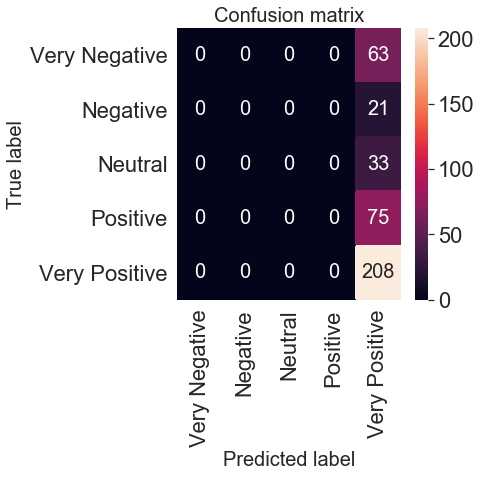

192

In [92]:
# Using tf.keras.losses.SparseCategoricalCrossentropy() loss function
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)


tf_batch = tokenizer(test["DATA_COLUMN"].tolist()[0:40], max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
predictions = tf.nn.softmax(tf_outputs[0], axis=-1)

y_test = test["LABEL_COLUMN"].tolist()[0:40]               
                     
LABELS = ['Very Negative','Negative','Neutral','Positive','Very Positive']

#X_test = test["DATA_COLUMN"]
#y_test = test["LABEL_COLUMN"]
#predictions = model.predict(X_test, batch_size=1000)
#max_test = np.argmax(y_test, axis=1)

max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(y_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

values = confusion_matrix.view()
error_count = values.sum() - np.trace(values)
error_count

In [79]:
#X_test = tokenizer(test["DATA_COLUMN"].reset_index(drop=True), max_length=128, padding=True, truncation=True, return_tensors='tf')
#y_test = test["LABEL_COLUMN"]
type(test["LABEL_COLUMN"])

pandas.core.series.Series

In [77]:
#tokenizer(test["DATA_COLUMN"].tolist(), max_length=128, padding=True, truncation=True, return_tensors='tf')
#test["DATA_COLUMN"].reset_index(drop=True)
#test["DATA_COLUMN"][1]

In [90]:
test["LABEL_COLUMN"].tolist()[0:4]

[2, 4, 0, 4]

In [40]:
X_test.info()

AttributeError: 'Series' object has no attribute 'info'

In [37]:
model.predict(X_test, batch_size=10)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


TypeError: in user code:

    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py:1536 call  *
        outputs = self.bert(
    /usr/local/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py:759 call  *
        embedding_output = self.embeddings(
    /usr/local/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py:288 call  *
        inputs_embeds = self.word_embeddings(input_ids)
    /usr/local/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py:159 call  *
        embeddings = tf.gather(params=self.weight, indices=flat_input_ids)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:4832 gather_v2
        batch_dims=batch_dims)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:4813 gather
        return params.sparse_read(indices, name=name)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:703 sparse_read
        self._handle, indices, dtype=self._dtype, name=name)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/gen_resource_variable_ops.py:569 resource_gather
        validate_indices=validate_indices, name=name)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:630 _apply_op_helper
        param_name=input_name)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:63 _SatisfiesTypeConstraint
        ", ".join(dtypes.as_dtype(x).name for x in allowed_list)))

    TypeError: Value passed to parameter 'indices' has DataType string not in list of allowed values: int32, int64
